In [1]:
import os


In [2]:
# Set path to mallet 


os.environ["mallet_home"] = r"C:\mallet"
path_to_mallet = r"C:\mallet\bin\mallet"

In [3]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd
import random


In [221]:
# Import cleaned dataset

csv = "C:/Users/laram/Downloads/cleaned_wiredfull.csv"
csv2 = "C:/Users/laram/Downloads/finaledit.csv"



In [222]:
df_first = pd.read_csv(csv2)


In [223]:
clean_df = pd.read_csv(csv)


In [224]:
clean_df.head()

,title,year,summary,tag,text_content,word_count
0,Catching Waves,2001,Haruki Nishijima collects analog electric waves like butterflies for his installation Remain in ...,NaN,haruki nishijima collects analog electric waves like butterflies installation remain light opens...,185
1,Playing God With the Handheld Market,2001,NET-BASED GAMING Think you could do a better job of running Palm Inc.? The troubled PDA maker – ...,Gear,gamingthink could better job running palm troubled pda maker hit huge sales losses product defec...,338
2,Peerless,2001,HARDWARE The Gist: Data Dock $399.95 (with 20-Gbyte Cartridge) Iomega’s Peerless weds the best o...,Gear,hardwarethe gist data dock cartridge iomega peerless weds best portable hard drives gigabytes re...,201
3,New And Improved!,2001,Is Chanel totally you? By etching Coco’s signature quilted pattern and logo directly onto the bo...,NaN,chanel totally etching coco signature quilted pattern logo directly onto body skinthetic takes b...,122
4,Whiteboard Jungle,2001,"HIGH TECH HIGH At a glance, the former warehouse looks like just another dotcom: The war room ha...",NaN,high tech highat glance former warehouse looks like another dotcom war room movable whiteboards ...,277


In [225]:
clean_df['text_content'] = df_first['text_content']


In [226]:
clean_df['text_content'] = clean_df['text_content'].astype(str)


In [227]:
# Further pre-processing with mallet 

training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in clean_df['text_content']]


In [228]:
original_texts = [text for text in clean_df['text_content']]


In [229]:
clean_titles = [title for title in clean_df['title']]


In [230]:
# Fill null values in the tag column

clean_df['tag'] = clean_df['tag'].fillna('Unlabelled')


In [231]:
clean_tags = [tag for tag in clean_df['tag']]

In [232]:
little_mallet_wrapper.print_dataset_stats(training_data)


Number of Documents: 32170
Mean Number of Words per Document: 198.0
Vocabulary Size: 142582


In [233]:
# Set number of topics K

num_topics = 40


In [234]:
training_data = training_data


In [235]:
#Change to your desired output directory
output_directory_path = "C:/Users/laram/Downloads/ldamodel"

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [236]:
# Train the LDA model

little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                             output_directory_path,
                                             num_topics,
                                             training_data)

Importing data...
Complete
Training topic model...
Complete


([['car',
   'system',
   'device',
   'light',
   'robot',
   'image',
   'computer',
   'design',
   'vehicle',
   'used',
   'machine',
   'camera',
   'use',
   'control',
   'ford',
   'display',
   'model',
   'power',
   'battery',
   'sound'],
  ['percent',
   'stock',
   'market',
   'index',
   'point',
   'dow',
   'nasdaq',
   'rose',
   'rate',
   'fell',
   'investor',
   'economy',
   'gained',
   'jones',
   'average',
   'lost',
   'street',
   'earnings',
   'trading',
   'day'],
  ['law',
   'privacy',
   'internet',
   'information',
   'government',
   'would',
   'federal',
   'policy',
   'group',
   'act',
   'state',
   'agency',
   'electronic',
   'consumer',
   'public',
   'online',
   'industry',
   'access',
   'use',
   'right'],
  ['web',
   'software',
   'user',
   'language',
   'page',
   'file',
   'program',
   'application',
   'interface',
   'version',
   'owser',
   'document',
   'use',
   'word',
   'text',
   'standard',
   'image',
   'too

In [ ]:
# Load topic keys 

topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

data = [{"Topic Number": topic_number, "Topic Keys": topic} for topic_number, topic in enumerate(topics)]
topicdf = pd.DataFrame(data)

# Display the DataFrame
pd.set_option('display.max_colwidth', None)

# Display the first 25 rows of the DataFrame in a pretty format
print(topicdf.head(40))

# Save the DataFrame to a CSV file
output_path = "C:/Users/laram/Downloads/topickeys_40lda.csv"
topicdf.to_csv(output_path, index=False)



In [ ]:
# Load topic distrubutions for each document 

topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

topic_distributions[0]


[0.010512176946831705,
 0.0006057332307392183,
 0.018378060090654208,
 0.0003485952253532517,
 0.08866199384890631,
 0.000663390895807877,
 0.00021377534396140155,
 0.03605710331472108,
 0.0003230812831131375,
 0.00020622075084749533,
 0.0003884010521669886,
 0.000514915307087633,
 0.0003705435920505838,
 0.0006185229739005976,
 0.018168035127453942,
 0.07635295505534358,
 0.00027223564067934753,
 0.23928595042237602,
 0.00045009592817389367,
 0.0005636365392380157,
 0.0003129420702939556,
 0.0007610634533097841,
 0.3891165074239416,
 0.06226945716874896,
 0.0002738019737121554,
 0.00026512657927950373,
 0.0007735191478754778,
 0.0007198574276491493,
 0.009427116137393608,
 0.00036286954148925907,
 0.0003492524754412981,
 0.002656913137313119,
 0.0005344075179875405,
 0.0002471349192263209,
 0.0008165850391719242,
 0.0011353475146903427,
 0.0009235276548426954,
 0.03572167606437014,
 0.00023436869805122483,
 0.00014310348580561923]

In [ ]:
# Extract the topic with the highest proportion for each document

dominant_topics = []
for doc_id, distribution in enumerate(topic_distributions):
    dominant_topic = max(enumerate(distribution), key=lambda x: x[1])[0]
    dominant_proportion = max(distribution)
    dominant_topics.append({"Document ID": doc_id, "Dominant Topic": dominant_topic, "Proportion": dominant_proportion})

# Create a DataFrame from the list of results
df_dominant_topics = pd.DataFrame(dominant_topics)

# Display the DataFrame
print(df_dominant_topics)
df_dominant_topics.to_csv("C:/Users/laram/Downloads/dominant_topics_40lda.csv", index=False)


       Document ID  Dominant Topic  Proportion
0                0              24    0.267442
1                1              11    0.212853
2                2               1    0.550212
3                3              16    0.492823
4                4               7    0.454873
...            ...             ...         ...
32165        32165              14    0.260016
32166        32166               5    0.435726
32167        32167               5    0.263995
32168        32168               5    0.158049
32169        32169               5    0.192996

[32170 rows x 3 columns]


In [ ]:
training_data_clean_titles = dict(zip(training_data, clean_titles))
training_data_original_text = dict(zip(training_data, original_texts))

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



In [ ]:
# load topic word probabilities 

topic_word_probability_dict = little_mallet_wrapper.load_topic_word_distributions("C:/Users/laram/Downloads/ldamodel/mallet.word_weights.25")


In [ ]:
# Extract the top 5 terms with the highest probability for each topic 

for _topic, _word_probability_dict in topic_word_probability_dict.items():
    print('Topic', _topic)
    for _word, _probability in sorted(_word_probability_dict.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(round(_probability, 4), '\t', _word)
    print()

Topic 0
0.0361 	 company
0.0178 	 online
0.0141 	 internet
0.014 	 million
0.0103 	 business

Topic 1
0.0132 	 device
0.0089 	 computer
0.0087 	 system
0.0065 	 palm
0.0062 	 new

Topic 2
0.0105 	 police
0.0063 	 case
0.0052 	 told
0.0051 	 fbi
0.0045 	 last

Topic 3
0.0239 	 microsoft
0.0222 	 court
0.0161 	 company
0.0149 	 case
0.0113 	 judge

Topic 4
0.0139 	 human
0.0132 	 gene
0.0127 	 cell
0.0099 	 drug
0.0098 	 researcher

Topic 5
0.0107 	 people
0.0086 	 like
0.0079 	 time
0.0079 	 year
0.0078 	 get

Topic 6
0.0278 	 stock
0.0258 	 percent
0.0181 	 market
0.0121 	 nasdaq
0.0114 	 index

Topic 7
0.0188 	 school
0.0157 	 student
0.0156 	 technology
0.0108 	 computer
0.0101 	 university

Topic 8
0.0164 	 country
0.0133 	 united
0.013 	 world
0.0128 	 government
0.0127 	 european

Topic 9
0.0206 	 law
0.0193 	 privacy
0.016 	 information
0.0151 	 internet
0.0088 	 government

Topic 10
0.0147 	 would
0.0125 	 house
0.0122 	 bill
0.0105 	 president
0.0102 	 state

Topic 11
0.0245 	 

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import wordcloud

In [ ]:
topics

[['year',
  'like',
  'life',
  'man',
  'day',
  'world',
  'first',
  'last',
  'time',
  'friend',
  'cele',
  'love',
  'family',
  'old',
  'never',
  'story',
  'back',
  'head',
  'young',
  'night'],
 ['court',
  'case',
  'law',
  'judge',
  'lawsuit',
  'suit',
  'attorney',
  'legal',
  'filed',
  'federal',
  'patent',
  'lawyer',
  'appeal',
  'ruling',
  'district',
  'copyright',
  'company',
  'claim',
  'state',
  'could'],
 ['software',
  'microsoft',
  'web',
  'system',
  'user',
  'company',
  'window',
  'application',
  'product',
  'linux',
  'version',
  'java',
  'netscape',
  'technology',
  'sun',
  'developer',
  'server',
  'owser',
  'operating',
  'code'],
 ['military',
  'attack',
  'war',
  'state',
  'united',
  'force',
  'israeli',
  'defense',
  'israel',
  'palestinian',
  'taliban',
  'bush',
  'official',
  'bin',
  'country',
  'president',
  'laden',
  'government',
  'terrorist',
  'afghanistan'],
 ['phone',
  'wireless',
  'mobile',
  'devic

In [ ]:
# Create word clouds with word proability list 

def create_word_cloud(topic_word_probabilities, topic_id,save_directory):
    # Extract the word probabilities for the given topic_id
    if topic_id not in topic_word_probabilities:
        print(f"Topic {topic_id} does not exist.")
        return

    word_probabilities = topic_word_probabilities[topic_id]

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white')

    # Generate word cloud using the word probabilities
    wordcloud.generate_from_frequencies(word_probabilities)
    
    # Sort word probabilities to get the words with frequencies
    sorted_word_probabilities = sorted(word_probabilities.items(), key=lambda x: x[1], reverse=True)
    top_20_words_with_frequencies = sorted_word_probabilities[:20]

    # Create the subplot layout
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))

    # Plot the word cloud
    ax[0].imshow(wordcloud, interpolation='bilinear')
    ax[0].axis('off')
    ax[0].set_title(f'Word Cloud for Topic {topic_id}')

    # Display the top 20 words with frequencies
    ax[1].axis('off')
    ax[1].set_title('Top 20 Words with Frequencies')
    words_with_freq_text = "\n".join([f"{word}: {freq:.4f}" for word, freq in top_20_words_with_frequencies])
    ax[1].text(0.5, 0.5, words_with_freq_text, horizontalalignment='center', verticalalignment='center', fontsize=12)

    # Save the plot
    save_path = f"{save_directory}/cloud_topic_{topic_id}.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Word cloud for Topic {topic_id} saved to {save_path}")

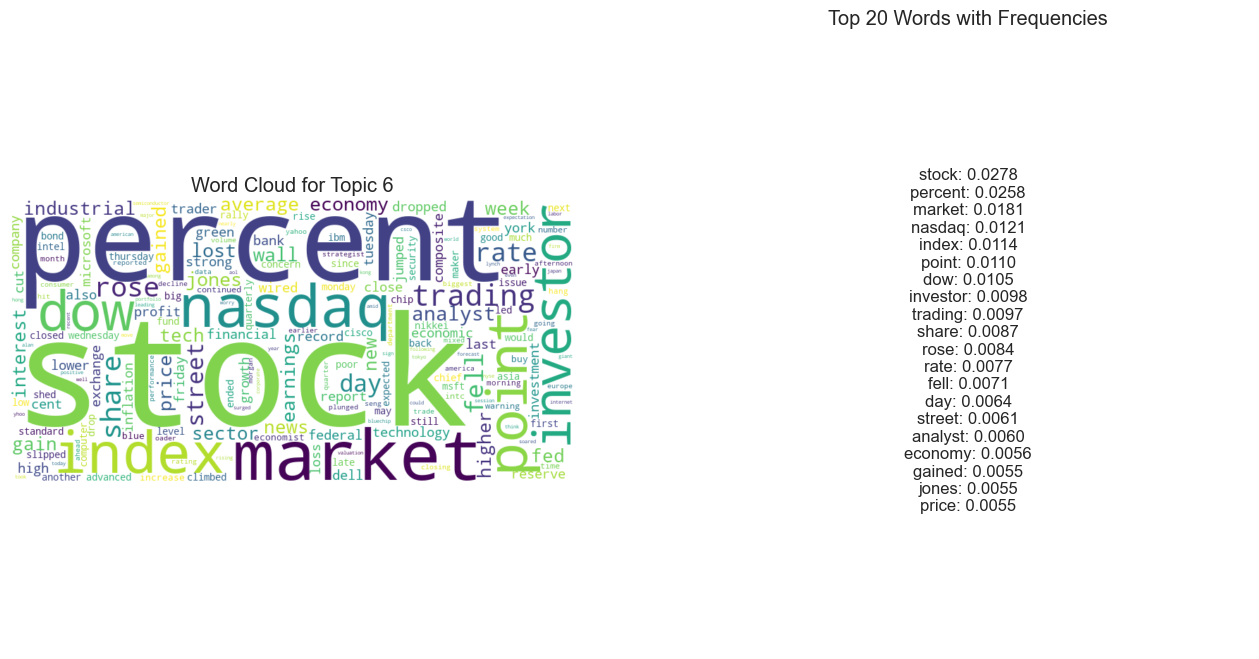

Word cloud for Topic 6 saved to C:/Users/laram/Downloads/cloud_topic_6.png


In [ ]:
topic_id = 6 
save_directory = "C:/Users/laram/Downloads"  
create_word_cloud(topic_word_probability_dict, topic_id, save_directory)

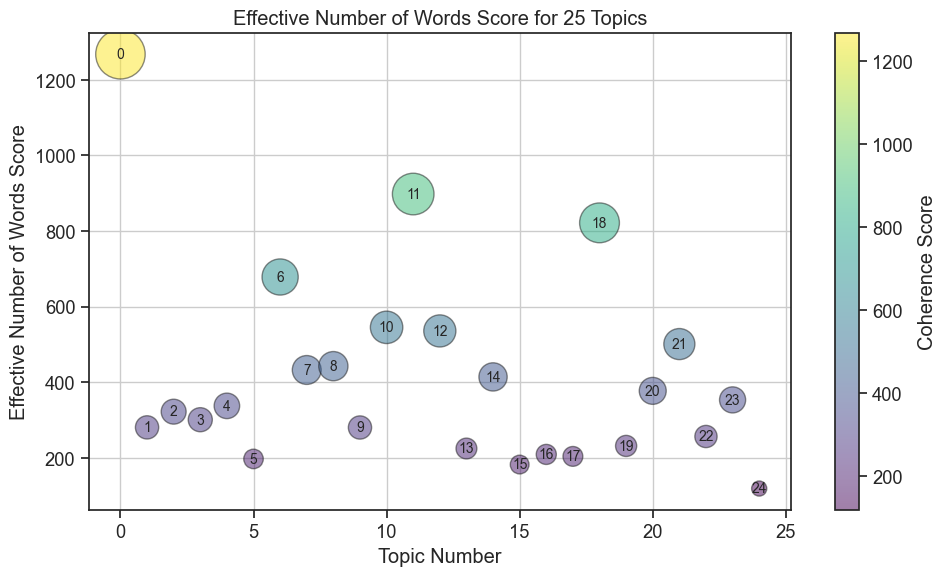

In [ ]:
# Extract relevant information from the diagnostic files such as effective number of words score and u_mass coherence

import os
import xml.etree.ElementTree as ET

# Specify the number of topics you're interested in
num_topics = 25 # Example: Choose the number of topics you want to analyze

# Path to your diagnostics directory and the specific diagnostic file for the chosen number of topics
diagnostics_dir = "C:/Users/laram/Downloads/cohmodel"
diagnostic_file = os.path.join(diagnostics_dir, f"diagnostics_{num_topics}.xml")

# Check if the diagnostic file exists
if not os.path.exists(diagnostic_file):
    print(f"Diagnostic file for {num_topics} topics not found.")
else:
    # Parse the XML file
    tree = ET.parse(diagnostic_file)
    root = tree.getroot()
    
    # Extract scores
    topic_scores = []
    for topic in root.findall('.//topic'):
        topic_number = int(topic.get('id'))
        score = float(topic.get('eff_num_words'))
        topic_scores.append((topic_number, score))
    
     # Unzip topic numbers and scores
    topics, scores = zip(*topic_scores)
    
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(topics, scores, s=scores, alpha=0.5, c=scores, cmap='viridis', edgecolors='k')
    
    # Annotate each circle with its topic number
    for topic_number, score in zip(topics, scores):
        plt.text(topic_number, score, str(topic_number), ha='center', va='center', fontsize=10)
    
    plt.colorbar(scatter, label='Coherence Score')
    plt.title(f'Effective Number of Words Score for {num_topics} Topics')
    plt.xlabel('Topic Number')
    plt.ylabel('Effective Number of Words Score')
    plt.grid(True)
    plt.tight_layout()
    save_path = "C:/Users/laram/Downloads/eff_num.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


In [ ]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)


In [ ]:
print(topics[0])

['year', 'like', 'life', 'man', 'day', 'world', 'first', 'last', 'time', 'friend', 'cele', 'love', 'family', 'old', 'never', 'story', 'back', 'head', 'young', 'night']


In [ ]:
# Extract the top representative documents for each topic 

def display_top_topics(topic_number, topics, training_data, topic_distributions, training_data_clean_titles, number_of_documents=5):

    # Fetch top documents for the specified topic number
    top_documents = little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents)
    
    # Print topic number and keys
    print(f"✨Topic {topic_number}✨\n\n{' '.join(topics[topic_number])}\n")
    
    # Print top documents
    for probability, document_index in top_documents:
        document_title = training_data_clean_titles[document_index]
        print(f"Probability: {round(probability, 4)}")
        print(f"Title: {document_title}\n")
    
    # Create a DataFrame for top documents
    data = [{
        "Topic Number": topic_number,
        "Topic Keys": ", ".join(topics[topic_number]),
        "Probability": round(probability, 4),
        "Document Title": training_data_clean_titles[document_index]
    } for probability, document_index in top_documents]
    
    top_docs_df = pd.DataFrame(data)
    
    # Display the DataFrame (showing the first 10 rows)
    print(top_docs_df.head(10))
    
    # Save to CSV if needed
    top_docs_df.to_csv(f"C:/Users/laram/Downloads/topic_top_documents{topic_number}.csv", index=False)



In [ ]:
# Set the topic number for analysis 

topic_number_to_analyze = 25 
display_top_topics(topic_number_to_analyze, topics, training_data, topic_distributions, training_data_clean_titles)

✨Topic 25✨

computer security hacker virus attack system network email source information code file worm program internet server news software cracker bug

Probability: 0.7592
Title: ISS Chimes In on Back Orifice

Probability: 0.712
Title: Code Red Returns

Probability: 0.7027
Title: 'Love Bug' Virus Running Amok

Probability: 0.6876
Title: Inept Virus Hits White House

Probability: 0.6874
Title: Code Blue Targets China Firm

   Topic Number  \
0            25   
1            25   
2            25   
3            25   
4            25   

                                                                                                                                                          Topic Keys  \
0  computer, security, hacker, virus, attack, system, network, email, source, information, code, file, worm, program, internet, server, news, software, cracker, bug   
1  computer, security, hacker, virus, attack, system, network, email, source, information, code, file, worm, program, i

In [ ]:
topics_10 = topics 

In [ ]:
# Make dataframe for results from K=10 model

def summarize_topics_to_df(topics):
    summaries = []
    for topic_id, topic_words in enumerate(topics):
        summaries.append({
            "Topic ID": topic_id,
            "Keywords": ", ".join(topic_words)
        })
    return pd.DataFrame(summaries)

summaries_df_10 = summarize_topics_to_df(topics_10)
print(summaries_df_10)
summaries_df_10.to_csv(f"C:/Users/laram/Downloads/summaries_topics10.csv", index=False)


   Topic ID  \
0         0   
1         1   
2         2   
3         3   
4         4   
5         5   
6         6   
7         7   
8         8   
9         9   

                                                                                                                                                                Keywords  
0                             people, new, like, technology, book, medium, year, work, web, world, time, school, get, student, online, computer, way, site, think, thing  
1        site, web, email, internet, user, information, name, company, security, computer, network, system, service, domain, online, people, message, number, page, data  
2                 state, official, country, united, people, year, government, police, city, would, attack, world, new, china, day, american, told, last, military, space  
3     would, government, court, law, state, case, federal, internet, bill, department, house, new, judge, could, washington, issue, president, justice

In [ ]:
display_top_titles_per_topic(topic_number=2, number_of_documents=5)


✨Topic 2✨

['percent', 'stock', 'market', 'share', 'quarter', 'year', 'cent', 'company', 'analyst', 'nasdaq', 'earnings', 'point', 'index', 'rose', 'trading', 'investor', 'dow', 'million', 'billion', 'rate']

0.9899 Blue Chips Nailed, Banks Slide

0.9868 Markets Yo-Yo on Day of Rumors

0.9861 Markets Take Glum News in Stride

0.9828 Dow Soars on Retail's Xmas Rally

0.9826 Apple Pulls Off a Profit



In [ ]:
display_top_titles_per_topic(topic_number=3, number_of_documents=5)


✨Topic 3✨

['music', 'digital', 'game', 'company', 'video', 'industry', 'player', 'napster', 'new', 'file', 'audio', 'record', 'recording', 'label', 'copyright', 'user', 'sony', 'song', 'medium', 'technology']

0.8955 Crypto Creeps into MP3 Domain

0.8854 Rio Goes Crypto

0.8518 Watershed for Digital Music

0.8493 Sony's MP3 Alternative

0.8478 EMI Plays Along with Downloads



25
32170
32170
First entry in topic_distributions: [0.001383822621037154, 0.231906030680785, 0.045194535895947616, 0.000658918274102016, 0.0004215598781734589, 0.0496680851680311, 0.00046704835176631217, 0.0007677988891374214, 0.000738334354647386, 0.0005951976970081003, 0.0008612502349935789, 0.0008533311093924563, 0.23175899235294944, 0.0003468545600196184, 0.00023041639528293217, 0.00042630315821898923, 0.12618983230253497, 0.02739937281668984, 0.009441238592095507, 0.0005017112858874714, 0.0005974715530309445, 0.0006751781165001156, 0.0010777425256894991, 0.0003974249249176636, 0.26744154826116145]
Length of topic_distributions: 32170
First 5 entries in clean_titles: ['Catching Waves', 'Playing God With the Handheld Market', 'Peerless', 'New And Improved!', 'Whiteboard Jungle']
First 5 entries in target_labels: ['Unlabelled', 'Gear', 'Gear', 'Unlabelled', 'Unlabelled']


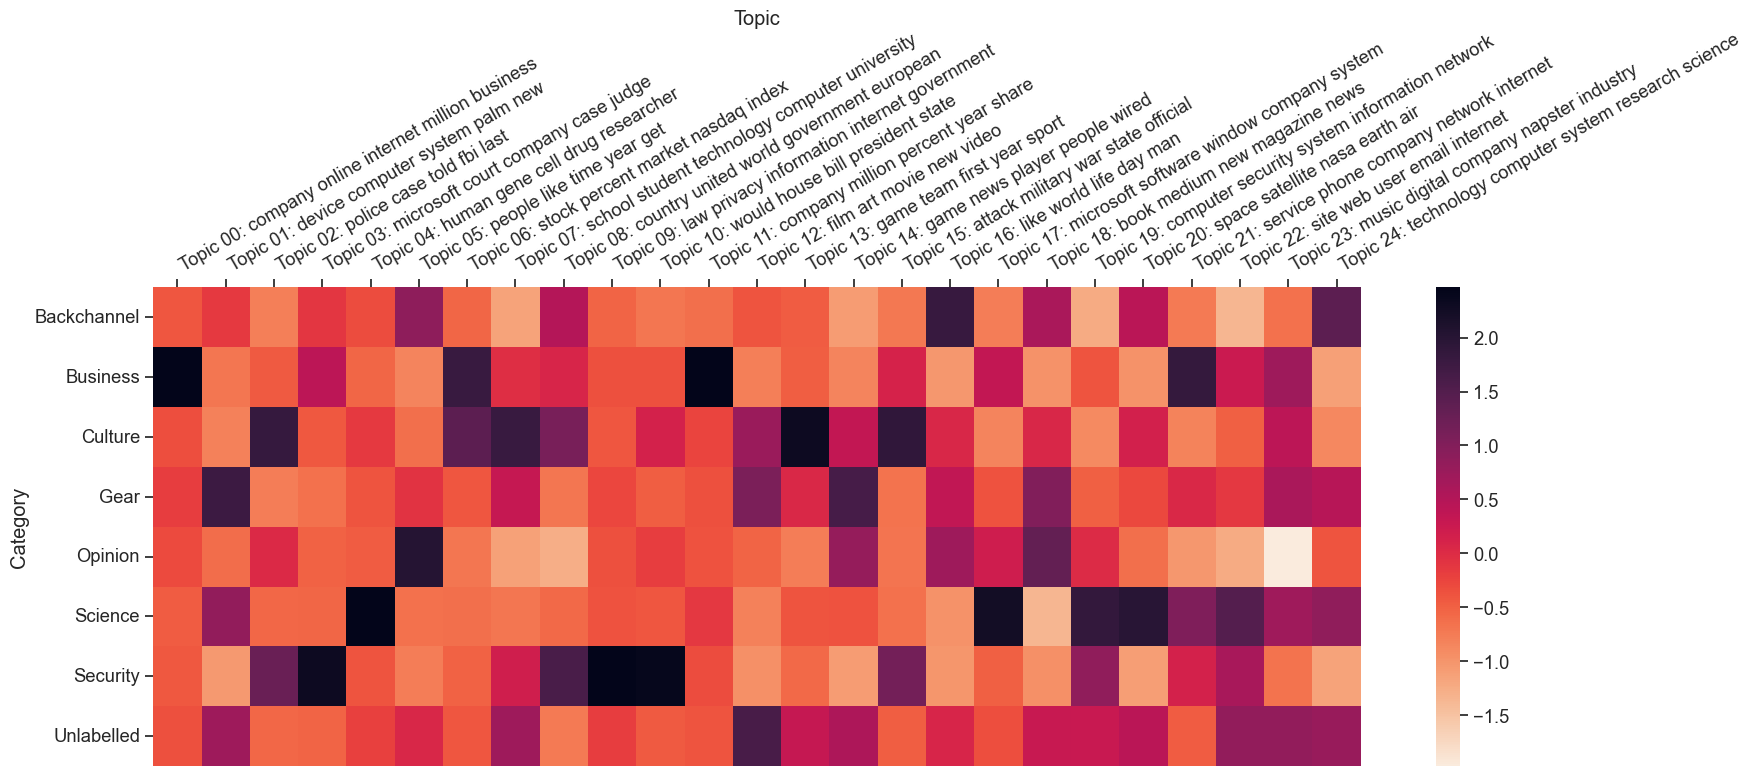

In [ ]:
# Create heatmap with tag categories as target labels 

topic_keys_file = r"C:\Users\laram\Downloads\ldamodel\mallet.topic_keys.25"
topic_distributions_file = r"C:\Users\laram\Downloads\ldamodel\mallet.topic_distributions.25"
output_directory_path = r"C:\Users\laram\Downloads"

# Load the topic keys
topics = little_mallet_wrapper.load_topic_keys(topic_keys_file)

# Load the topic distributions
topic_distributions = little_mallet_wrapper.load_topic_distributions(topic_distributions_file)

print(len(topics))
print(len(target_labels))
print(len(topic_distributions))

print("First entry in topic_distributions:", topic_distributions[0])
print("Length of topic_distributions:", len(topic_distributions))


target_labels = clean_tags

print("First 5 entries in clean_titles:", clean_titles[:5])
print("First 5 entries in target_labels:", target_labels[:5])

try:
    little_mallet_wrapper.plot_categories_by_topics_heatmap(
        clean_tags,
        topic_distributions,
        topics,
        output_directory_path + r'\categories_by_topics.pdf',
        target_labels=target_labels,
        dim=(18, 8)
    )
except Exception as e:
    print("Error during plotting:", str(e))

In [ ]:
topic_keys_file = r"C:\Users\laram\Downloads\ldamodel\mallet.topic_keys.40"
topic_distributions_file = r"C:\Users\laram\Downloads\ldamodel\mallet.topic_distributions.40"
output_path = r"C:\Users\laram\Downloads\topics_over_time.png"

In [ ]:
topic_keys = little_mallet_wrapper.load_topic_keys(topic_keys_file)

# Load the topic distributions
topic_distributions = little_mallet_wrapper.load_topic_distributions(topic_distributions_file)


In [ ]:
clean_years = clean_df['year']

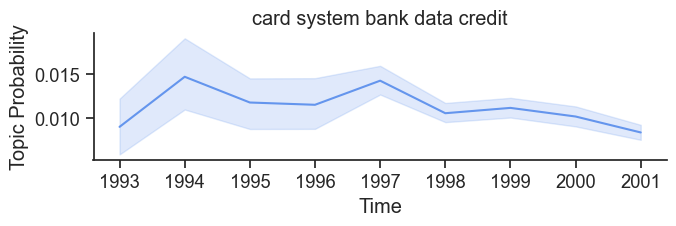

In [ ]:
# Plot topics over time for a single topic 

topic_index = 8  # Set topic number
little_mallet_wrapper.plot_topics_over_time(topic_distributions, topic_keys, clean_years, topic_index, output_path=output_path)

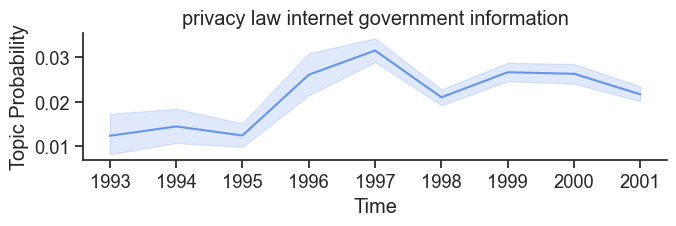

In [ ]:
topic_index = 19
output_path = r"C:\Users\laram\Downloads\topics_over_time_topic_{}.png".format(topic_index)


little_mallet_wrapper.plot_topics_over_time(topic_distributions, topic_keys, clean_years, topic_index, output_path=output_path)

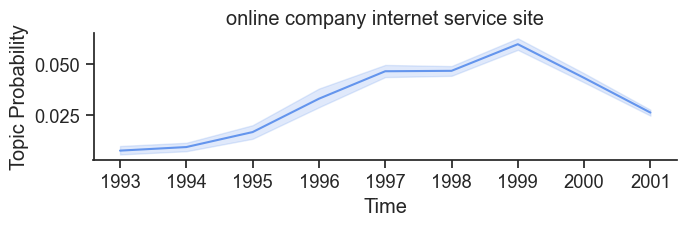

In [239]:
topic_index = 35
output_path = r"C:\Users\laram\Downloads\topics_over_time_topic_{}.png".format(topic_index)
little_mallet_wrapper.plot_topics_over_time(topic_distributions, topic_keys, clean_years, topic_index, output_path=output_path)

In [ ]:
# Extract the topic coherence scores 
import xml.etree.ElementTree as ET

# Load and parse the diagnostics file
file_path = "C:/Users/laram\Downloads/ldamodel/mallet.diagnostics.15.xml"  # Update with the actual path to your diagnostics file
tree = ET.parse(file_path)
root = tree.getroot()

# Extract topic metrics
topics = root.findall('.//topic')

# Print coherence for each topic
for topic in topics:
    topic_id = topic.get('id')
    coherence = topic.get('coherence')
    print(f'Topic {topic_id} Coherence: {coherence}')

Topic 0 Coherence: -274.3357
Topic 1 Coherence: -317.7928
Topic 2 Coherence: -313.9975
Topic 3 Coherence: -251.6447
Topic 4 Coherence: -375.6869
Topic 5 Coherence: -352.0743
Topic 6 Coherence: -273.7945
Topic 7 Coherence: -257.0495
Topic 8 Coherence: -364.8253
Topic 9 Coherence: -301.8423
Topic 10 Coherence: -347.5236
Topic 11 Coherence: -271.0858
Topic 12 Coherence: -214.3599
Topic 13 Coherence: -384.9480
Topic 14 Coherence: -243.8258


<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\laram\AppData\Local\Temp\ipykernel_15880\2986303958.py:4: SyntaxWarning: invalid escape sequence '\D'
  file_path = "C:/Users/laram\Downloads/ldamodel/mallet.diagnostics.15.xml"  # Update with the actual path to your diagnostics file
